In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns



In [3]:
audit = pd.read_csv('C:/Users/Satyam/Desktop/UTD_2ndSem/Applied Machine Learning/audit_risk.csv')
trail = pd.read_csv('C:/Users/Satyam/Desktop/UTD_2ndSem/Applied Machine Learning/trial.csv')

In [6]:
merged = audit.merge(trail, on=['Sector_score','LOCATION_ID','PARA_A', 'PARA_B','TOTAL', 'numbers','Money_Value','History','Score','Risk'], how= 'inner')

In [7]:
merged.shape

(629, 35)

In [8]:
merged.columns

Index(['Sector_score', 'LOCATION_ID', 'PARA_A', 'Score_A', 'Risk_A', 'PARA_B',
       'Score_B', 'Risk_B', 'TOTAL', 'numbers', 'Score_B.1', 'Risk_C',
       'Money_Value', 'Score_MV', 'Risk_D', 'District_Loss', 'PROB', 'RiSk_E',
       'History', 'Prob', 'Risk_F', 'Score', 'Inherent_Risk', 'CONTROL_RISK',
       'Detection_Risk', 'Audit_Risk', 'Risk', 'SCORE_A', 'SCORE_B', 'Marks',
       'MONEY_Marks', 'District', 'Loss', 'LOSS_SCORE', 'History_score'],
      dtype='object')

In [9]:
merged.LOCATION_ID.unique()
merged.LOCATION_ID.value_counts()

19         56
8          54
12         48
9          47
16         41
2          39
5          36
4          28
6          26
15         26
13         25
11         20
29         20
32         18
22         18
14         14
18         12
1          10
39          9
31          9
27          8
37          7
28          7
25          6
43          5
20          4
36          4
7           4
30          4
21          4
40          3
38          3
3           2
34          1
41          1
LOHARU      1
NUH         1
17          1
SAFIDON     1
24          1
33          1
42          1
23          1
44          1
35          1
Name: LOCATION_ID, dtype: int64

In [10]:
merged.replace(['SAFIDON', 'LOHARU', 'NUH'], [45,46,47],inplace=True)

In [11]:
merged.LOCATION_ID.value_counts()

19    56
8     54
12    48
9     47
16    41
2     39
5     36
4     28
15    26
6     26
13    25
29    20
11    20
32    18
22    18
14    14
18    12
1     10
31     9
39     9
27     8
37     7
28     7
25     6
43     5
30     4
36     4
20     4
7      4
21     4
40     3
38     3
3      2
35     1
46     1
47     1
34     1
41     1
24     1
42     1
45     1
33     1
44     1
23     1
17     1
Name: LOCATION_ID, dtype: int64

In [12]:
merged.LOCATION_ID.unique()

array(['23', '6', '7', '8', '13', '37', '24', '3', '4', '14', '5', '20',
       '19', '21', '22', '9', '11', '12', '29', '30', '38', '31', '2',
       '32', '16', '33', '15', '36', '34', '18', '25', '39', '27', '35',
       '40', '41', '42', '1', '28', 46, 47, 45, '43', '44', '17'],
      dtype=object)

In [13]:
merged.LOCATION_ID = pd.to_numeric(merged.LOCATION_ID)

In [14]:
merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 629 entries, 0 to 628
Data columns (total 35 columns):
Sector_score      629 non-null float64
LOCATION_ID       629 non-null int64
PARA_A            629 non-null float64
Score_A           629 non-null float64
Risk_A            629 non-null float64
PARA_B            629 non-null float64
Score_B           629 non-null float64
Risk_B            629 non-null float64
TOTAL             629 non-null float64
numbers           629 non-null float64
Score_B.1         629 non-null float64
Risk_C            629 non-null float64
Money_Value       628 non-null float64
Score_MV          629 non-null float64
Risk_D            629 non-null float64
District_Loss     629 non-null int64
PROB              629 non-null float64
RiSk_E            629 non-null float64
History           629 non-null int64
Prob              629 non-null float64
Risk_F            629 non-null float64
Score             629 non-null float64
Inherent_Risk     629 non-null float64
CONT

In [15]:
merged.columns[merged.isnull().any()]

Index(['Money_Value'], dtype='object')

In [16]:
merged.Money_Value.unique()

array([3.3800e+00, 9.4000e-01, 0.0000e+00, 1.1750e+01, 2.9500e+00,
       4.4950e+01, 7.7900e+00, 7.3400e+00, 4.4200e+00, 9.6000e-01,
       1.0430e+01, 7.0000e-03, 9.0000e+00, 4.1280e+01, 1.4030e+01,
       6.3180e+01, 3.4240e+01, 2.0519e+02, 1.0000e-01, 1.1160e+01,
       1.2500e+00, 1.4600e+00, 1.1600e+00, 1.5241e+02, 1.0800e+00,
       2.8400e+00, 9.0000e-01, 9.6700e+00, 3.2680e+01, 9.3503e+02,
       2.9630e+01, 1.1000e-01, 2.6200e+00, 2.4300e+00, 1.2613e+02,
       2.0790e+01, 1.5692e+02, 1.2290e+01, 2.2900e+00, 2.5100e+00,
       8.3100e+00, 1.6000e-01, 4.7900e+01, 8.9100e+00, 4.9500e+00,
       1.7500e+00, 6.8000e-01, 6.0000e-02, 1.5820e+01, 5.8000e-01,
       2.1531e+02, 5.0000e-02, 5.3340e+01, 1.0690e+01, 5.6900e+00,
       1.3500e+00, 1.1690e+01, 1.4600e+01, 2.0780e+01, 1.0222e+02,
       8.7337e+02, 1.4000e+00, 4.2000e-01, 3.6520e+01, 6.0200e+00,
       1.7160e+01, 1.2910e+01, 1.0790e+01, 3.4600e+00, 2.3300e+00,
       5.5800e+00, 7.6000e-01, 2.5270e+01, 2.0000e-01, 7.5600e

In [17]:
merged = merged.dropna()

In [18]:
X = merged.loc[:, merged.columns != 'Risk']
y = merged.Risk

In [19]:
X.head()

,Sector_score,LOCATION_ID,PARA_A,Score_A,Risk_A,PARA_B,Score_B,Risk_B,TOTAL,numbers,...,Detection_Risk,Audit_Risk,SCORE_A,SCORE_B,Marks,MONEY_Marks,District,Loss,LOSS_SCORE,History_score
0,3.89,23,4.18,0.6,2.508,2.50,0.2,0.500,6.68,5.0,...,0.5,1.7148,6,2,2,2,2,0,2,2
1,3.89,6,0.00,0.2,0.000,4.83,0.2,0.966,4.83,5.0,...,0.5,0.5108,2,2,2,2,2,0,2,2
2,3.89,6,0.51,0.2,0.102,0.23,0.2,0.046,0.74,5.0,...,0.5,0.3096,2,2,2,2,2,0,2,2
3,3.89,6,0.00,0.2,0.000,10.80,0.6,6.480,10.80,6.0,...,0.5,3.5060,2,6,6,6,2,0,2,2
4,3.89,6,0.00,0.2,0.000,0.08,0.2,0.016,0.08,5.0,...,0.5,0.2832,2,2,2,2,2,0,2,2


In [26]:
model = LinearRegression()
rfe = RFE(model, 3)
X_rfe = rfe.fit_transform(X,y)  
model.fit(X_rfe,y)
print(rfe.support_)
print(rfe.ranking_)

NameError: name 'LinearRegression' is not defined

In [22]:
nof_list=np.arange(1,34)            
high_score=0
#Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 0)
    model = LinearRegression()
    rfe = RFE(model,nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train,y_train)
    X_test_rfe = rfe.transform(X_test)
    model.fit(X_train_rfe,y_train)
    score = model.score(X_test_rfe,y_test)
    score_list.append(score)
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

Optimum number of features: 3
Score with 3 features: 1.000000


c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [25]:
cols = list(X.columns)
model = LogisticRegression()
#Initializing RFE model
rfe = RFE(model, 3)             
#Transforming data using RFE
X_rfe = rfe.fit_transform(X,y)  
#Fitting the data to model
model.fit(X_rfe,y)              
temp = pd.Series(rfe.support_,index = cols)
selected_features_rfe = temp[temp==True].index
print(selected_features_rfe)

Index(['numbers', 'Inherent_Risk', 'District'], dtype='object')


c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [27]:
X.shape

(628, 34)

In [28]:
y.shape

(628,)

In [29]:
X_train_org, X_test_org, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [31]:
scaler = MinMaxScaler()

In [32]:
X_train = scaler.fit_transform(X_train_org)
X_test = scaler.transform(X_test_org)


c:\users\satyam\favorites\lib\site-packages\sklearn\preprocessing\data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [34]:
X_test

array([[0.015     , 0.67391304, 0.06682353, ..., 0.        , 0.        ,
        0.5       ],
       [0.        , 0.15217391, 0.15470588, ..., 0.        , 0.        ,
        0.        ],
       [0.9262069 , 0.06521739, 0.00870588, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.9262069 , 0.17391304, 0.02988235, ..., 0.        , 0.        ,
        0.        ],
       [0.03517241, 0.7826087 , 0.04917647, ..., 0.        , 0.        ,
        0.        ],
       [0.00241379, 0.32608696, 0.02141176, ..., 0.        , 0.        ,
        0.        ]])

In [33]:
X_train


array([[0.00896552, 0.06521739, 0.02188235, ..., 0.        , 0.        ,
        0.        ],
       [0.03517241, 0.45652174, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.03517241, 0.13043478, 0.01294118, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.10869565, 0.00929412, ..., 0.        , 0.        ,
        0.        ],
       [0.015     , 0.65217391, 0.06411765, ..., 0.        , 0.        ,
        0.        ],
       [0.9262069 , 0.23913043, 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [35]:
k_range = range(1,31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy') 
    k_scores.append(scores.mean())
k_scores

[0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9959983993597439,
 0.9939575830332134,
 0.9939575830332134,
 0.9919967987194879,
 0.9919967987194879,
 0.9919967987194879,
 0.9919967987194879,
 0.9860752300920369,
 0.9860752300920369,
 0.984075230092037]

Text(0, 0.5, 'Cross Validated Accuracy')

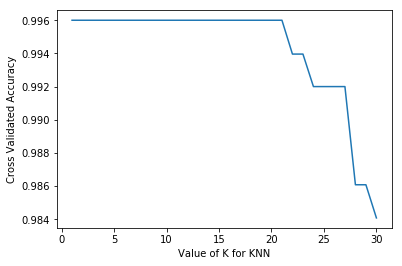

In [36]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross Validated Accuracy')

In [108]:
knn = KNeighborsClassifier()
score = cross_val_score(knn, X_train,y_train, cv=10, scoring= 'accuracy').mean()
score

0.9979591836734694

In [109]:
import numpy as np
import pandas as pd

In [110]:
k_range = list(range(1,31))


In [38]:
param_grid = dict(n_neighbors=k_range)


In [39]:
grid = GridSearchCV(knn, param_grid, cv=10, scoring='accuracy')


In [40]:
grid.fit(X_train,y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=30, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'n_neighbors': range(1, 31)}, pre_dispatch='2*n_jobs',
       refit=True, return_train_score='warn', scoring='accuracy',
       verbose=0)

In [114]:
print("Best parameters: {}".format(grid.best_params_))
print("Best cross-validation score: {:.2f}".format(grid.best_score_))

Best parameters: {'n_neighbors': 1}
Best cross-validation score: 1.00


In [41]:
import pandas as pd
# convert to DataFrame
results = pd.DataFrame(grid.cv_results_)
# show the first 5 rows
display(results)

c:\users\satyam\favorites\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\satyam\favorites\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\satyam\favorites\lib\site-packages\sklearn\utils\deprecation.py:125: FutureWarning: You are accessing a training score ('split2_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
c:\users\satyam\favorites\lib\site-packages\sklearn\

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.001898,0.000699,0.003898,0.000832,1,{'n_neighbors': 1},1.000000,1.000000,0.980392,1.0,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,0.001600,0.000665,0.003493,0.000922,2,{'n_neighbors': 2},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
2,0.001396,0.000485,0.003100,0.000299,3,{'n_neighbors': 3},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
3,0.001199,0.000400,0.003497,0.000500,4,{'n_neighbors': 4},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
4,0.001100,0.000300,0.003400,0.000492,5,{'n_neighbors': 5},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
5,0.001298,0.000455,0.003398,0.000489,6,{'n_neighbors': 6},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
6,0.001200,0.000400,0.003196,0.000401,7,{'n_neighbors': 7},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
7,0.001398,0.000487,0.003196,0.000396,8,{'n_neighbors': 8},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
8,0.001398,0.000487,0.003400,0.000492,9,{'n_neighbors': 9},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886
9,0.001000,0.000009,0.003795,0.000599,10,{'n_neighbors': 10},1.000000,1.000000,0.980392,1.0,...,0.997783,0.995565,0.995575,0.995575,0.995575,0.995575,0.995585,0.997792,0.996016,0.000886


In [43]:
logreg=LogisticRegression()

In [44]:
param_grid = {"C": [0.001, 0.01, 0.1, 1, 10, 100, 1000], "penalty": ["l1","l2"] }
logreg_cv=GridSearchCV(logreg,param_grid,cv=10)
logreg_cv.fit(X_train,y_train)
print("tuned hyperparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

tuned hyperparameters :(best parameters)  {'C': 0.001, 'penalty': 'l2'}
accuracy : 1.0


c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to sile

In [45]:
logreg2=LogisticRegression(C=0.001,penalty="l2")
logreg2.fit(X_train,y_train)
print("score",logreg2.score(X_test,y_test))

score 1.0


c:\users\satyam\favorites\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [46]:
# Set the parameters by cross-validation
tuned_parameters = [{'kernel': ['rbf'], 'gamma': [0.01,0.1,1,10],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]},
                    {'kernel': ['poly'], 'degree': [1,2,3,4],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}]

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

tuned hyperparameters :(best parameters)  {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
accuracy : 1.0


c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
c:\users\satyam\favorites\lib\site-packages\sklearn\svm\base.py:196: FutureW

In [120]:
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Grid scores on development set:

0.514 (+/-0.010) for {'C': 0.01, 'gamma': 0.01, 'kernel': 'rbf'}
0.514 (+/-0.010) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.946 (+/-0.047) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.980 (+/-0.047) for {'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}
0.514 (+/-0.010) for {'C': 0.1, 'gamma': 0.01, 'kernel': 'rbf'}
0.904 (+/-0.103) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.966 (+/-0.047) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.980 (+/-0.047) for {'C': 0.1, 'gamma': 10, 'kernel': 'rbf'}
0.853 (+/-0.091) for {'C': 1, 'gamma': 0.01, 'kernel': 'rbf'}
0.962 (+/-0.045) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.978 (+/-0.045) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.988 (+/-0.036) for {'C': 1, 'gamma': 10, 'kernel': 'rbf'}
0.974 (+/-0.039) for {'C': 10, 'gamma': 0.01, 'kernel': 'rbf'}
0.978 (+/-0.045) for {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}
0.988 (+/-0.036) for {'C': 10, 'gamma': 1, 'kernel': 'rbf'}
0.998 (+/-0.012) for {'C': 10, 'gamm

In [47]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))


Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        63

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [48]:
ksvc=SVC(C=1,kernel="rbf",gamma=10)
ksvc.fit(X_train,y_train)
print("score",ksvc.score(X_test,y_test))

score 1.0


In [49]:
tuned_parameters = {'kernel': ['linear'],
                     'C': [0.01, 0.1, 1, 10, 100, 1000]}

clf = GridSearchCV(SVC(), tuned_parameters, cv=10)
clf.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",clf.best_params_)
print("accuracy :",clf.best_score_)

tuned hyperparameters :(best parameters)  {'C': 1, 'kernel': 'linear'}
accuracy : 0.99800796812749


In [125]:
print("Grid scores on development set:")
print()
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Grid scores on development set:

0.837 (+/-0.079) for {'C': 0.01, 'kernel': 'linear'}
0.970 (+/-0.044) for {'C': 0.1, 'kernel': 'linear'}
0.978 (+/-0.045) for {'C': 1, 'kernel': 'linear'}
0.982 (+/-0.045) for {'C': 10, 'kernel': 'linear'}
0.998 (+/-0.012) for {'C': 100, 'kernel': 'linear'}
0.998 (+/-0.012) for {'C': 1000, 'kernel': 'linear'}


In [126]:
print("Detailed classification report:")
print("The model is trained on the full development set.")
print("The scores are computed on the full evaluation set.")

y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

Detailed classification report:
The model is trained on the full development set.
The scores are computed on the full evaluation set.
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        63
           1       1.00      1.00      1.00        63

   micro avg       1.00      1.00      1.00       126
   macro avg       1.00      1.00      1.00       126
weighted avg       1.00      1.00      1.00       126



In [50]:
lsvc=SVC(C=1,kernel="linear")
lsvc.fit(X_train,y_train)
print("score",lsvc.score(X_test,y_test))

score 1.0


In [52]:
param_grid = {'max_depth': np.arange(3, 10)}
tree = GridSearchCV(DecisionTreeClassifier(), param_grid)
tree.fit(X_train, y_train)
print("tuned hyperparameters :(best parameters) ",tree.best_params_)
print("accuracy :",tree.best_score_)
tree_preds = tree.predict_proba(X_test)[:, 1]
tree_performance = roc_auc_score(y_test, tree_preds)
print ('DecisionTree: Area under the ROC curve = {}'.format(tree_performance))

tuned hyperparameters :(best parameters)  {'max_depth': 3}
accuracy : 1.0
DecisionTree: Area under the ROC curve = 1.0


c:\users\satyam\favorites\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [53]:
dtree=DecisionTreeClassifier(max_depth=3)
dtree.fit(X_train,y_train)
print("score",dtree.score(X_test,y_test))

score 1.0


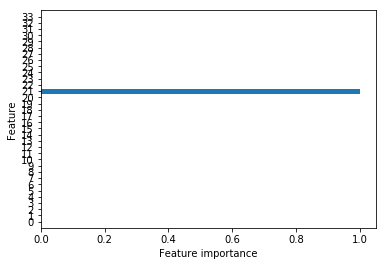

In [54]:

import matplotlib.pyplot as plt
%matplotlib inline
def plot_feature_importances_cancer(model):
    n_features = X_train.shape[1]
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features))
    plt.xlabel("Feature importance")
    plt.ylabel("Feature")
    plt.ylim(-1, n_features)

plot_feature_importances_cancer(dtree)